In [ ]:
!apt-get update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
!update-alternatives --set java /usr/lib/jvm/java-8-openjdk-amd64/jre/bin/java
!java -version
!pip install pyspark==3.1.2
!pip install tensorflow
!pip install imblearn

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:3 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:6 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:7 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:9 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,750 kB]
Get:10 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [9,067 kB]
Get:11 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,257 kB]
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [3,399 kB]
Get:13 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [3,040 

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.4/238.4 kB 6.3 MB/s eta 0:00:00


In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Spark ML").getOrCreate()
Commerce = spark.read.option("header","true").csv("/content/drive/MyDrive/ML/ECommerceDataset2.csv")
print("The shape of the dataset is {:d} rows by {:d} columns".format(Commerce.count(), len(Commerce.columns)))
Commerce2=Commerce.toPandas()
Commerce2.head(10)

The shape of the dataset is 5630 rows by 20 columns


,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4,Mobile Phone,3,6,Debit Card,Female,3,3,Laptop & Accessory,2,Single,9,1,11,1,1,5,160
1,50002,1,None,Phone,1,8,UPI,Male,3,4,Mobile,3,Single,7,1,15,0,1,0,121
2,50003,1,None,Phone,1,30,Debit Card,Male,2,4,Mobile,3,Single,6,1,14,0,1,3,120
3,50004,1,0,Phone,3,15,Debit Card,Male,2,4,Laptop & Accessory,5,Single,8,0,23,0,1,3,134
4,50005,1,0,Phone,1,12,CC,Male,None,3,Mobile,5,Single,3,0,11,1,1,3,130
5,50006,1,0,Computer,1,22,Debit Card,Female,3,5,Mobile Phone,5,Single,2,1,22,4,6,7,139
6,50007,1,None,Phone,3,11,Cash on Delivery,Male,2,3,Laptop & Accessory,2,Divorced,4,0,14,0,1,0,121
7,50008,1,None,Phone,1,6,CC,Male,3,3,Mobile,2,Divorced,3,1,16,2,2,0,123
8,50009,1,13,Phone,3,9,E wallet,Male,None,4,Mobile,3,Divorced,2,1,14,0,1,2,127
9,50010,1,None,Phone,1,31,Debit Card,Male,2,5,Mobile,3,Single,2,0,12,1,1,1,123


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from collections import Counter
import tensorflow as tf
from keras import models
from keras import regularizers
from keras import layers
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score ,recall_score
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.lines as mlines
import matplotlib.patches as mpatches

/tmp/ipython-input-9-3518678526.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(y='Churn', data=Churn,palette=colors)


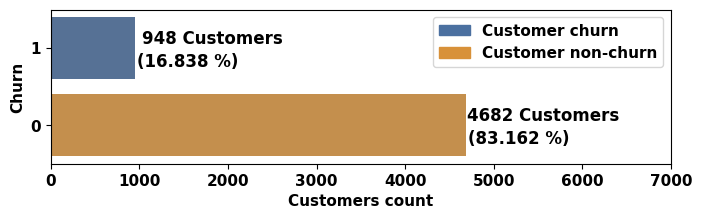

In [ ]:
Churn = Commerce2.copy()
colors = ["#4b70a0", "#d89139"]
plt.figure(figsize=(8,2))
ax = sns.countplot(y='Churn', data=Churn,palette=colors)
for a in ax.patches:
    ax.annotate('('+format(( a.get_width()/5630)*100,'.3f')+' %)', (a.get_width()+600,a.get_y() + a.get_height()/2),ha='center',va='center',size=12,xytext=(0, -10),textcoords='offset points')
    ax.annotate( str(int(a.get_width()) )+' Customers', (a.get_width()+870, -0.3+a.get_y() + a.get_height()/2),ha='center',va='center',size=12,xytext=(0, -10),textcoords='offset points')

font = {'family' : 'sans-serif','weight' : 'bold','size' : 11}
plt.rc('font', **font)
plt.ylabel('Churn', fontsize=11,weight='bold')
plt.xlabel('Customers count', fontsize=11,weight='bold')
blue_line1 = mpatches.Patch(color=colors[0], label='Customer churn')
blue_line0 = mpatches.Patch(color=colors[1], label='Customer non-churn')
ax.legend(handles=[blue_line1,blue_line0])
plt.xlim(0,7000)
plt.show()

[np.int64(348), np.int64(276), np.int64(324)]
[[np.int64(1310), np.int64(955), np.int64(2417)], [np.int64(324), np.int64(276), np.int64(348)]]
[np.int64(1310), np.int64(955), np.int64(2417)]
[np.int64(324), np.int64(276), np.int64(348)]


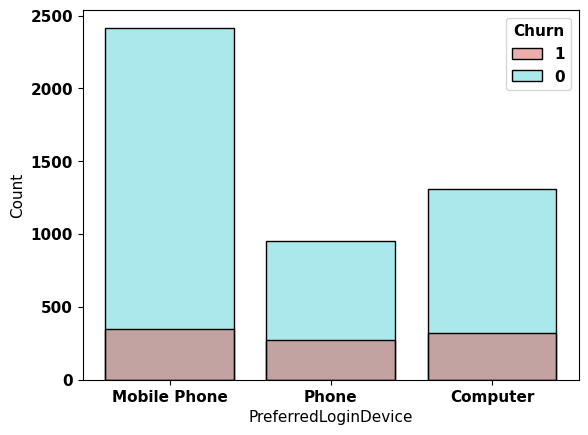

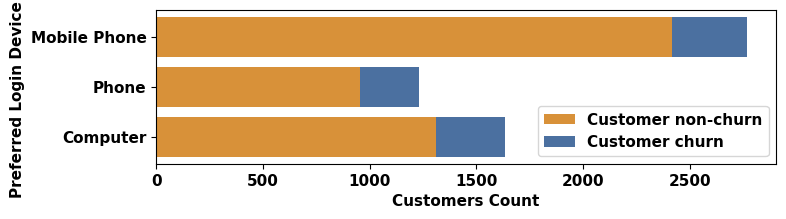

In [ ]:
PreferredLoginDevice = Commerce2.copy()
PreferredLoginDevice['PreferredLoginDevice']=PreferredLoginDevice['PreferredLoginDevice'].apply(lambda  x: x if x is not None else "None")
f6=[]
plt.figure(figsize=(6,7))
ax = sns.histplot(data=PreferredLoginDevice, x=PreferredLoginDevice['PreferredLoginDevice'], hue='Churn',palette='hls', weights=1,shrink=0.8)
for label in ax.get_xticklabels():
   f6.append(label.get_text())
f = []
f2 = []
for a in ax.patches:
  f.append(float(format(( a.get_height()/5630)*100,'.2f')))
  f2.append(a.get_height())
f21 = f2[:int(len(f2)/2)]
f22 = f2[int(len(f2)/2):]
print(f22)


f21.reverse()
f22.reverse()
f6.reverse()
data=[f21,f22]
print(data)
segments = 2
percentages = (np.random.randint(5,20, (len(f6), segments)))
y_pos = np.arange(len(f6))

fig = plt.figure(figsize=(8,2))
ax = fig.add_subplot(111)
patch_handles = []
left = np.zeros(len(f6))
for i, d in enumerate(data):
    print(d)
    patch_handles.append(ax.barh(y_pos, d, color=colors[1-i], align='center', left=left))
    left += d
for j in range(len(patch_handles)):
    for i, patch in enumerate(patch_handles[j].get_children()):
        bl = patch.get_xy()
        x = 0.5*patch.get_width() + bl[0]
        y = 0.5*patch.get_height() + bl[1]
ax.set_yticks(y_pos)
ax.set_yticklabels(f6)
plt.ylabel('Preferred Login Device   k',fontsize=11,weight='bold')
plt.xlabel('Customers Count',fontsize=11,weight='bold')
plt.legend(["Customer non-churn", "Customer churn"])
plt.show()

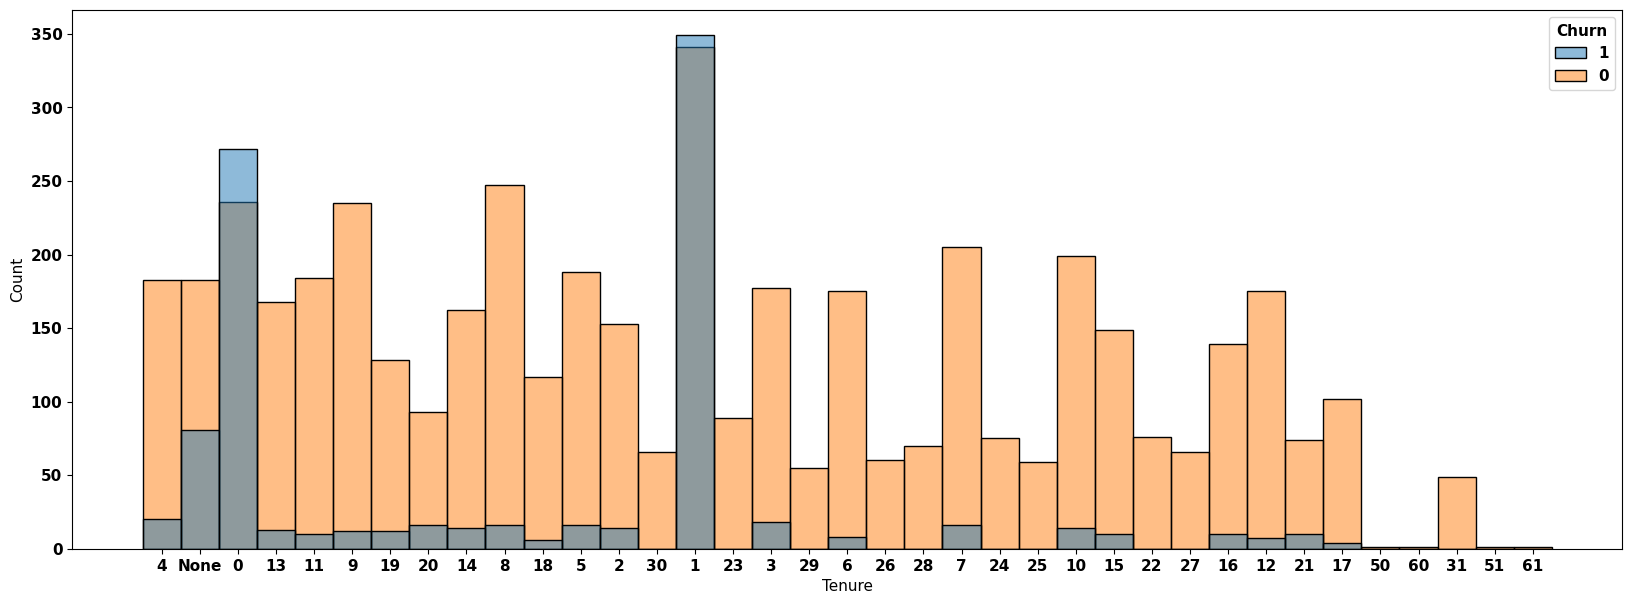

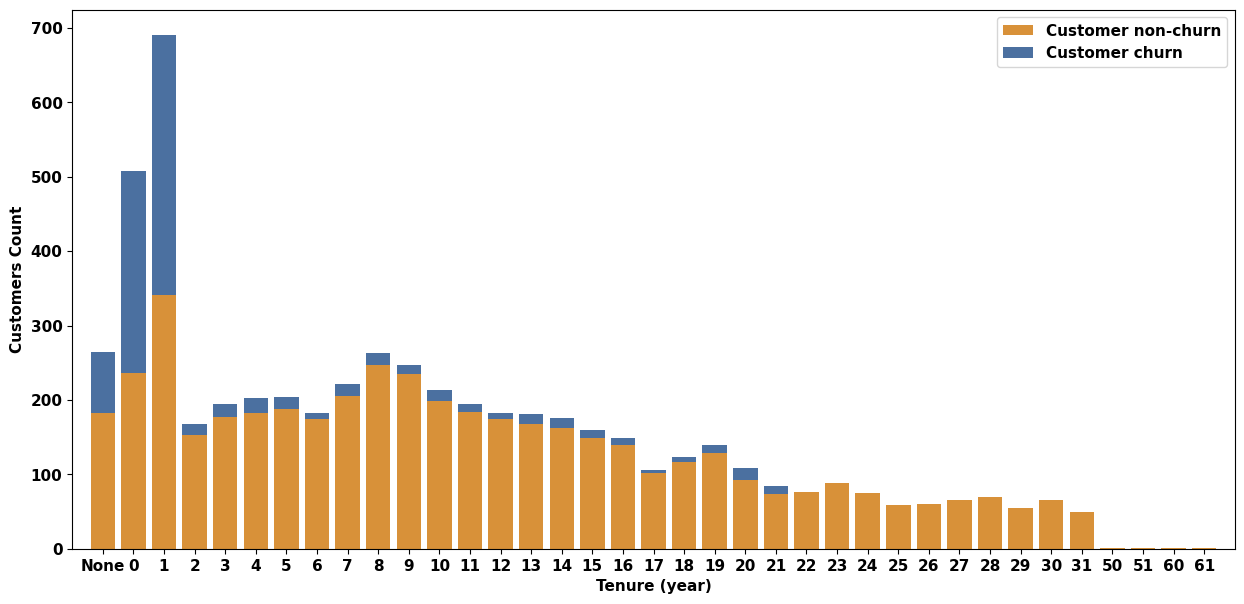

In [ ]:

import matplotlib.pyplot as plt
import numpy as np
Tenure = Commerce2.copy()
Tenure['Tenure']=Tenure['Tenure'].apply(lambda  x: x if x is not None else "None")
f6=[]
plt.figure(figsize=(20,7))
ax = sns.histplot(data=Tenure, x=Tenure['Tenure'], hue='Churn')
for label in ax.get_xticklabels():
   f6.append(label.get_text())
f = []
f2 = []
for a in ax.patches:
  f.append(float(format(( a.get_height()/5630)*100,'.2f')))
  f2.append(a.get_height())
f21 = f2[:int(len(f2)/2)]
f22 = f2[int(len(f2)/2):]
XN = []
XS = []
for j,i in enumerate(f6):
  if i != "None":
    XN.append(int(i))
  else:
    XN.append(int(-1))
for i in range(len(XN)):
  for j in range(len(XN)):
     if XN[i]<XN[j]:
        XN[j],XN[i] = (XN[i],XN[j])
        f21[j],f21[i] = (f21[i],f21[j])
        f22[j],f22[i] = (f22[i],f22[j])
for i in XN:
   if i != -1:
       XS.append(str(i))
   else:
       XS.append("None")
x = XS
y1 = np.array(f21)
y2 = np.array(f22)
plt.figure(figsize=(15,7))
bar1 = plt.bar(x, y1, color=colors[1])
bar2 = plt.bar(x, y2, bottom=y1, color=colors[0])
plt.xlabel('Tenure (year)',fontsize=11,weight='bold')
plt.ylabel('Customers Count',fontsize=11,weight='bold')
plt.legend(["Customer non-churn", "Customer churn"])
plt.xlim(-1,37)
plt.show()

* max Customers Count 
134
churn 98
non-churn 36
* min Customers Count 
1
churn 1
non-churn 0
* min Average cashback  
4
churn 4
non-churn 0
* max Average cashback  
4
churn 4
non-churn 0
k  4682


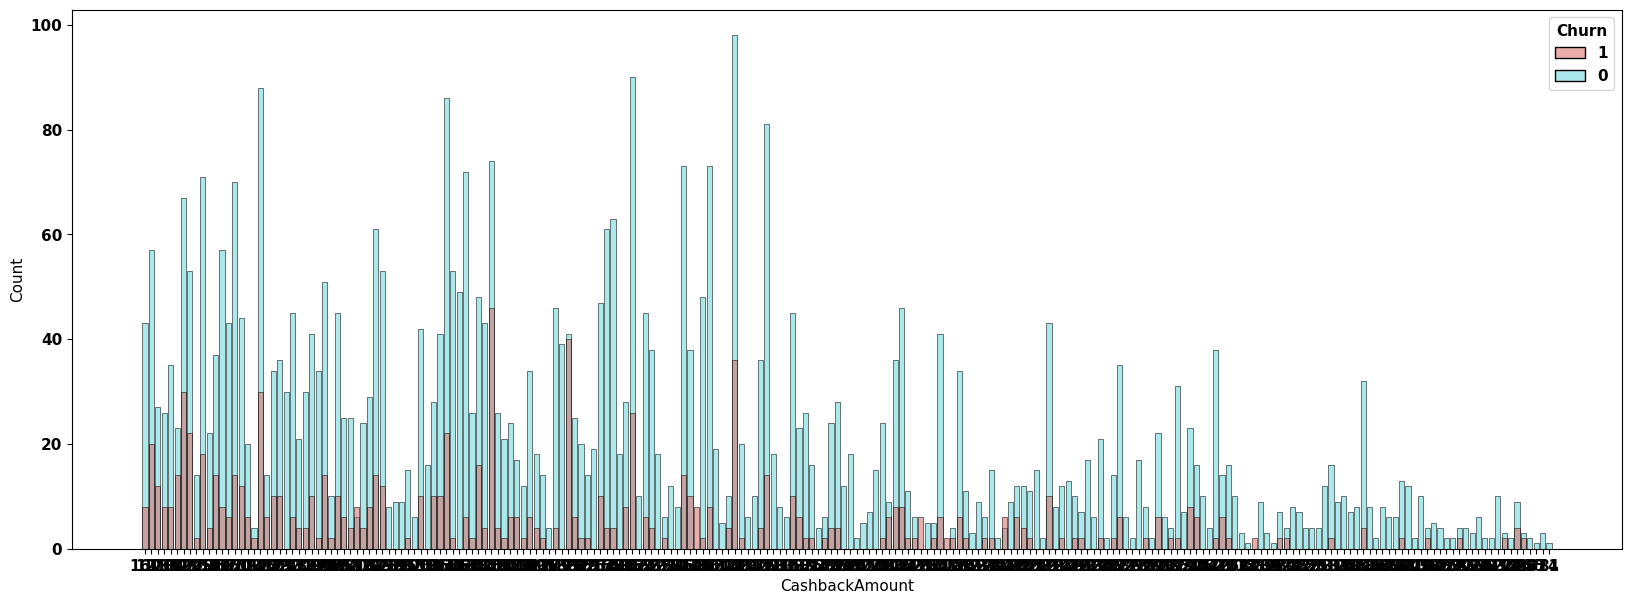

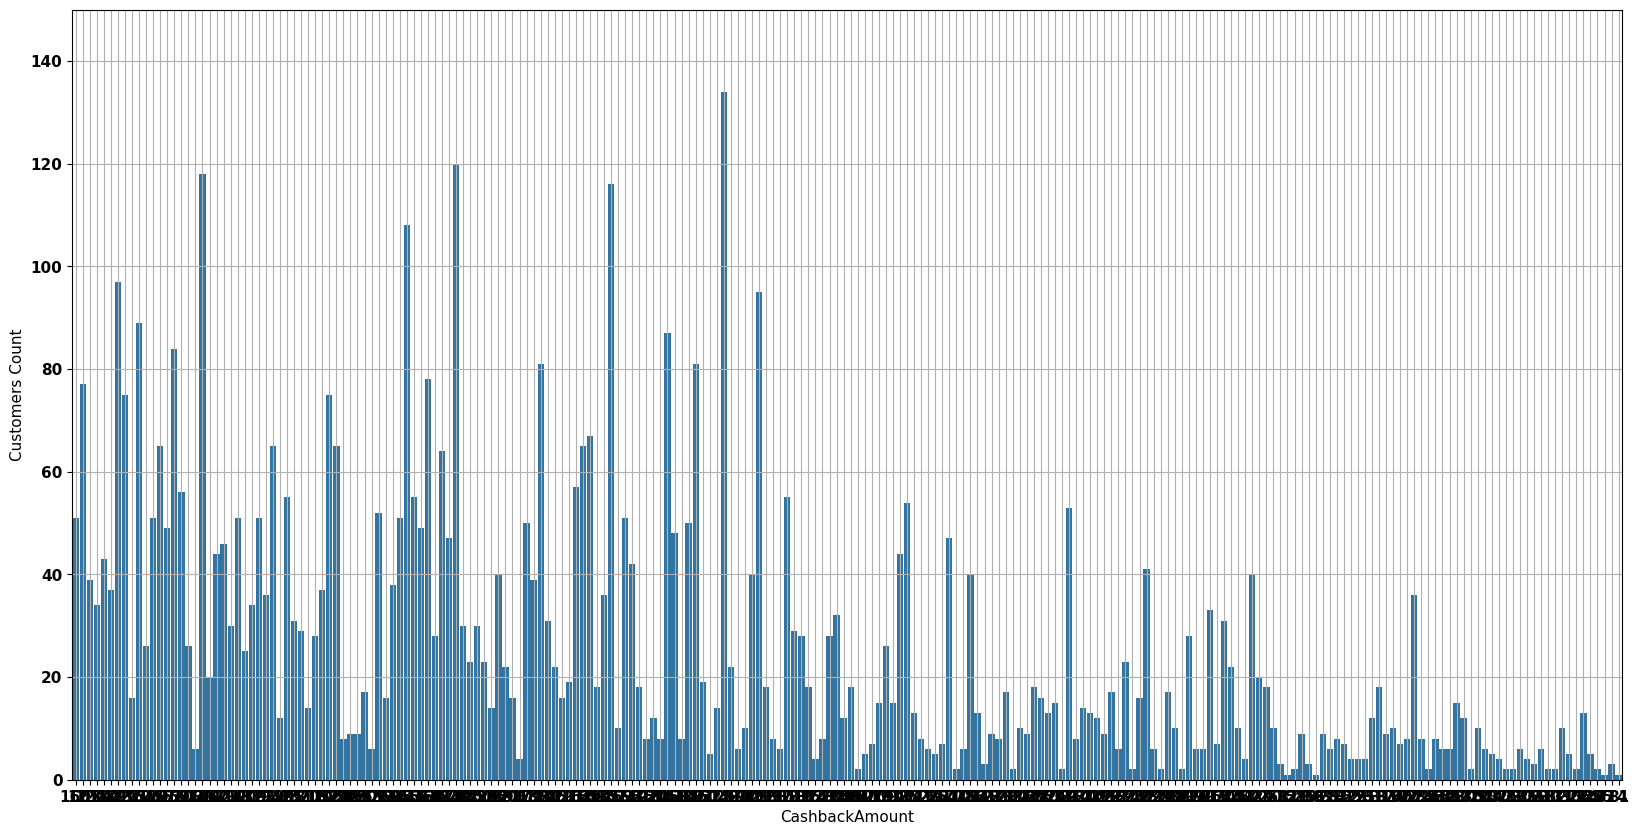

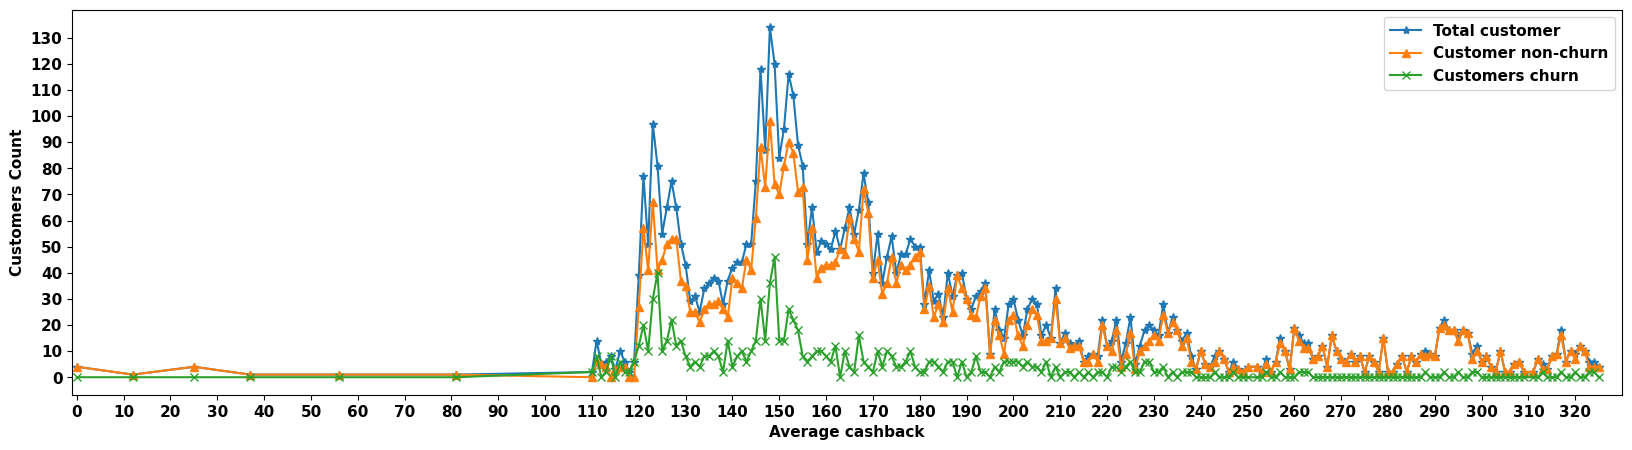

In [ ]:
CashbackAmount = Commerce2.copy()
CashbackAmount['CashbackAmount']=CashbackAmount['CashbackAmount'].apply(lambda  x: x if x is not None else "None")
plt.figure(figsize=(20,7))
ax = sns.histplot(data=CashbackAmount, x=CashbackAmount['CashbackAmount'], hue='Churn',palette='hls', weights=1,shrink=0.8)
f = []
f2 = []
f3 = []
f4 = []
f5 = []
f6 = []
for a in ax.patches:
  f.append(float(format(( a.get_height()/5630)*100,'.2f')))
  f2.append(a.get_height())
plt.figure(figsize=(20,10))
ax = sns.countplot(x='CashbackAmount', data=CashbackAmount,width=0.9)
plt.grid()
i=0
ch=0
noch=0
for a in ax.patches:
    ch= ch+ f2[i]
    noch= noch + f2[i+int(len(f2)/2)]
    f3.append(int(a.get_height()))
    f4.append(f2[i])
    f5.append(f2[i+int(len(f2)/2)])
    i=i+1
for label in ax.get_xticklabels():
   f6.append(int(label.get_text()))
from operator import itemgetter
indices, f66 = zip(*sorted(enumerate(f6), key=itemgetter(1)))
f33 = [f3[i] for i in indices]
f44 = [f4[i] for i in indices]
f55 = [f5[i] for i in indices]
print('* max Customers Count ')
print(f33[f66.index(148)])
print('churn',f44[f66.index(148)])
print('non-churn',f55[f66.index(148)])
print('* min Customers Count ')
print(f33[f66.index(12)])
print('churn',f44[f66.index(12)])
print('non-churn',f55[f66.index(12)])
print('* min Average cashback  ')
print(f33[f66.index(0)])
print('churn',f44[f66.index(0)])
print('non-churn',f55[f66.index(0)])
print('* max Average cashback  ')
print(f33[f66.index(325)])
print('churn',f44[f66.index(325)])
print('non-churn',f55[f66.index(325)])
plt.ylim(0,150)
plt.xlabel('CashbackAmount')
plt.ylabel('Customers Count')


print('k ',sum(f44))
plt.figure(figsize=(20,5))
plt.clf()
plt.plot(f66,f33 ,'-*',label='Total customer')
plt.plot(f66,f44, '-^',label='Customer non-churn')
plt.plot(f66, f55, '-x',label='Customers churn')
plt.yticks(range(0,140,10))
plt.xticks(range(0,330,10))
plt.xlabel('Average cashback',fontsize=11,weight='bold')
plt.ylabel('Customers Count',fontsize=11,weight='bold')
plt.legend()
plt.xlim(-1,330)
plt.show()

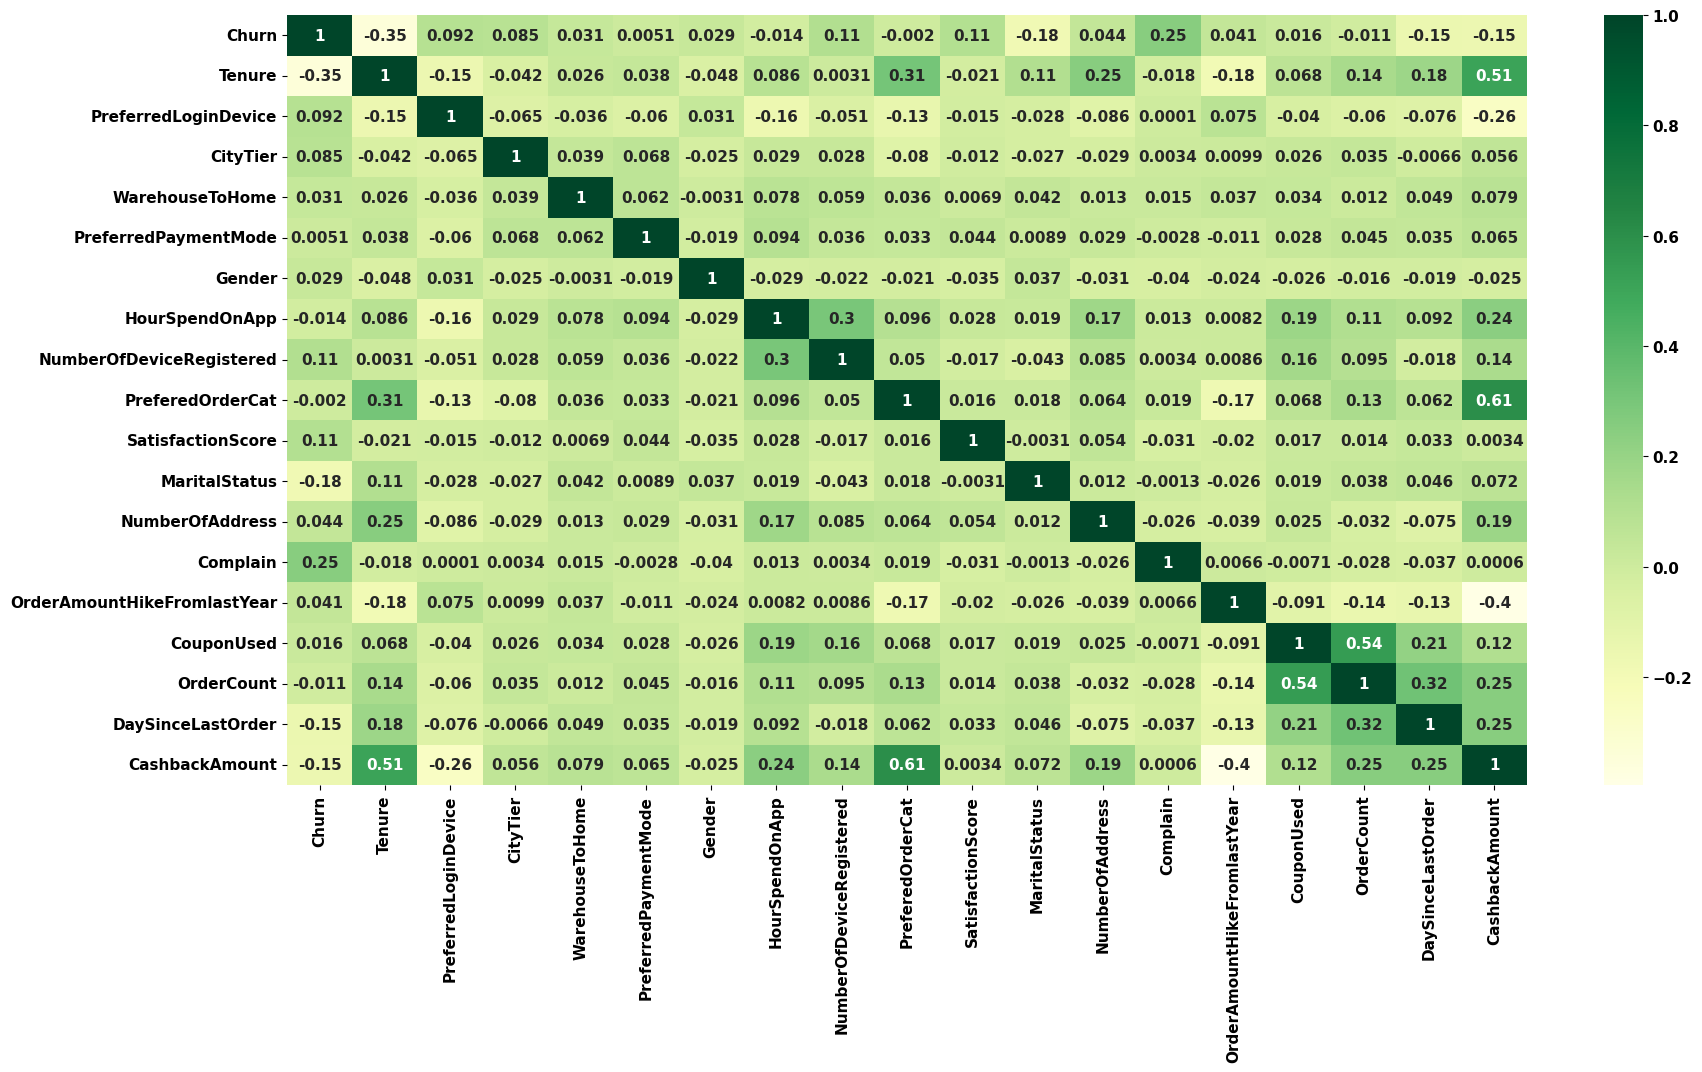

In [ ]:
PreferredLoginDevice = ['Mobile Phone', 'Phone', 'Computer']
PreferredPaymentMode = ['Debit Card', 'UPI', 'CC', 'Cash on Delivery', 'E wallet', 'COD', 'Credit Card']
Gender = ['Female', 'Male']
PreferedOrderCat = ['Laptop & Accessory', 'Mobile', 'Mobile Phone', 'Others', 'Fashion', 'Grocery']
MaritalStatus = ['Single', 'Divorced', 'Married']

data = Commerce2.copy()

data['PreferredLoginDevice']=data['PreferredLoginDevice'].apply(lambda  x:  PreferredLoginDevice.index(str(x))/3.0)
data['PreferredPaymentMode']=data['PreferredPaymentMode'].apply(lambda  x:  PreferredPaymentMode.index(str(x))/7.0)
data['Gender']=data['Gender'].apply(lambda  x:  Gender.index(str(x))/2.0)
data['PreferedOrderCat']=data['PreferedOrderCat'].apply(lambda  x:  PreferedOrderCat.index(str(x))/6.0)
data['MaritalStatus']=data['MaritalStatus'].apply(lambda  x:  MaritalStatus.index(str(x))/3.0)

data['CustomerID']=data['CustomerID'].apply(lambda  x: ((55630.0-float(x))/5630.0))
data['Churn']=data['Churn'].apply(lambda  x: float(x))
data['CityTier']=data['CityTier'].apply(lambda  x: float(x)/3.0)
data['NumberOfDeviceRegistered']=data['NumberOfDeviceRegistered'].apply(lambda  x: float(x)/6.0)
data['SatisfactionScore']=data['SatisfactionScore'].apply(lambda  x: float(x)/5.0)
data['CashbackAmount']=data['CashbackAmount'].apply(lambda  x: float(x)/220.0)
data['Complain']=data['Complain'].apply(lambda  x: float(x))
data['NumberOfAddress']=data['NumberOfAddress'].apply(lambda  x: float(x)/15.0)

data['Tenure']=data['Tenure'].apply(lambda  x: float(x)/37.0 if x is not None else -1.0/37.0)
data['HourSpendOnApp']=data['HourSpendOnApp'].apply(lambda  x: float(x)/7.0 if x is not None else -1/7.0)
data['DaySinceLastOrder']=data['DaySinceLastOrder'].apply(lambda  x: float(x)/23.0 if x is not None else -1/23.0)
data['CouponUsed']=data['CouponUsed'].apply(lambda  x: float(x)/18.0 if x is not None else -1/18.0)
data['OrderCount']=data['OrderCount'].apply(lambda  x: float(x)/17.0 if x is not None else -1/17.0)
data['WarehouseToHome']=data['WarehouseToHome'].apply(lambda  x: float(x)/35.0 if x is not None else -1/35.0)
data['OrderAmountHikeFromlastYear']=data['OrderAmountHikeFromlastYear'].apply(lambda  x: float(x)/17.0 if x is not None else -1/17.0)


data1 = data.drop(['CustomerID'],axis=1)

font = {'family' : 'sans-serif','weight' : 'bold','size' : 11}
plt.rc('font', **font)
plt.figure(figsize=(20,10))
sns.heatmap(data1.corr(), cmap="YlGn", annot=True)
plt.show()

In [ ]:
k=0
for i in data:
  print(i, end='\t')
  for j in range(4):
    print(Commerce2[i][j], '\t', '{:.4f}'.format(data[i][j]),end='\t')
  print('', end='\n')

CustomerID	50001 	 0.9998	50002 	 0.9996	50003 	 0.9995	50004 	 0.9993	
Churn	1 	 1.0000	1 	 1.0000	1 	 1.0000	1 	 1.0000	
Tenure	4 	 0.1081	None 	 -0.0270	None 	 -0.0270	0 	 0.0000	
PreferredLoginDevice	Mobile Phone 	 0.0000	Phone 	 0.3333	Phone 	 0.3333	Phone 	 0.3333	
CityTier	3 	 1.0000	1 	 0.3333	1 	 0.3333	3 	 1.0000	
WarehouseToHome	6 	 0.1714	8 	 0.2286	30 	 0.8571	15 	 0.4286	
PreferredPaymentMode	Debit Card 	 0.0000	UPI 	 0.1429	Debit Card 	 0.0000	Debit Card 	 0.0000	
Gender	Female 	 0.0000	Male 	 0.5000	Male 	 0.5000	Male 	 0.5000	
HourSpendOnApp	3 	 0.4286	3 	 0.4286	2 	 0.2857	2 	 0.2857	
NumberOfDeviceRegistered	3 	 0.5000	4 	 0.6667	4 	 0.6667	4 	 0.6667	
PreferedOrderCat	Laptop & Accessory 	 0.0000	Mobile 	 0.1667	Mobile 	 0.1667	Laptop & Accessory 	 0.0000	
SatisfactionScore	2 	 0.4000	3 	 0.6000	3 	 0.6000	5 	 1.0000	
MaritalStatus	Single 	 0.0000	Single 	 0.0000	Single 	 0.0000	Single 	 0.0000	
NumberOfAddress	9 	 0.6000	7 	 0.4667	6 	 0.4000	8 	 0.5333	
Complain	1 

In [ ]:
data = data.drop(['CustomerID'],axis=1)
#data = data.drop(['NumberOfDeviceRegistered'],axis=1)
#data = data.drop(['CouponUsed'],axis=1)
x=data.drop(['Churn'],axis=1).to_numpy()
y=data['Churn'].to_numpy()


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42, stratify=y)
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)


In [ ]:
class MyThresholdCallback(tf.keras.callbacks.Callback):
    def __init__(self, threshold):
        super(MyThresholdCallback, self).__init__()
        self.threshold = threshold

    def on_epoch_end(self, epoch, logs=None):
        accuracy = logs["val_acc"]
        if accuracy >= self.threshold:
            self.model.stop_training = True


early_stop=MyThresholdCallback(threshold=1.963)
def build_model():
 model = models.Sequential()
 model.add(layers.InputLayer(input_shape=(18,), name="input"))
 model.add(layers.Dense(50,name="hidden_1", activation='relu'))
 model.add(layers.Dropout(0.30,name="hidden_2"))
 model.add(layers.Dense(40,name="hidden_3", activation='relu'))
 model.add(layers.Dropout(0.30,name="hidden_4"))
 model.add(layers.Dense(30,name="hidden_5", activation='relu'))
 model.add(layers.Dense(20,name="hidden_6", activation='relu'))
 model.add(layers.Dense(10,name="hidden_7", activation='relu'))
 model.add(layers.Dense(1,name="output", activation='sigmoid'))
 model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['acc'])
 return model



k=10
num_val_samples = len(X_train) // k
num_epochs = 100
all_scores = []
all_acc_histories = []
all_los_histories = []
all_acc_histories1 = []
all_los_histories1 = []
test_f1=[]
test_accuracy=[]
precision=[]
recall=[]



for i in range(k):
 print('processing fold #', i)
 val_data = X_train[i * num_val_samples: (i + 1) * num_val_samples,:]
 val_targets = y_train[i * num_val_samples: (i + 1) * num_val_samples]
 partial_train_data = np.concatenate( [X_train[:i * num_val_samples], X_train[(i + 1) * num_val_samples:]], axis=0)
 partial_train_targets = np.concatenate( [y_train[:i * num_val_samples], y_train[(i + 1) * num_val_samples:]], axis=0)

 from imblearn.over_sampling import SMOTE ,BorderlineSMOTE ,ADASYN
 oversample = SMOTE()
 partial_train_data1, partial_train_targets1 = oversample.fit_resample(partial_train_data, partial_train_targets)


 model = build_model()
 history = model.fit(partial_train_data, partial_train_targets, epochs=500, batch_size=25, verbose=0, validation_data=(val_data, val_targets))
 val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
 print(val_mse, val_mae)
 all_scores.append(val_mae)
 acc_history = history.history['acc']
 loss_values = history.history['loss']

 val_loss_values = history.history['val_loss']
 val_acc_values = history.history['val_acc']
 all_acc_histories1.append(val_acc_values)
 all_los_histories1.append(val_loss_values)

 all_acc_histories.append(acc_history)
 all_los_histories.append(loss_values)

 test_true_labels = val_targets.tolist()
 predict_x=model.predict(val_data)
 a = (predict_x>=0.5).astype(int).ravel()
 a = [ int(i) for i in a]
 b = [ int(i) for i in test_true_labels]
 test_f1.append( f1_score(b, a))
 test_accuracy.append( accuracy_score(b, a))
 precision.append( precision_score(b, a))
 recall.append( recall_score(b, a))


print('all_scores',np.mean(all_scores))
print('test_accuracy',np.mean(test_accuracy))
print('test_f1',np.mean(test_f1))
print('precision',np.mean(precision))
print('recall',np.mean(recall))

In [ ]:
average_acc_history = [np.mean([x[i] for x in all_acc_histories]) for i in range(500)]
average_loss_history = [np.mean([x[i] for x in all_los_histories]) for i in range(500)]

average_acc_history1 = [np.mean([x[i] for x in all_acc_histories1]) for i in range(500)]
average_loss_history1 = [np.mean([x[i] for x in all_los_histories1]) for i in range(500)]

histor9 = pd.DataFrame({'acc': average_acc_history, 'lose':average_loss_history,'val_acc': average_acc_history1, 'val_lose':average_loss_history})
hist_csv_file = '/content/Imbalanced_Dataset_None_No_Yes.csv'
with open(hist_csv_file, mode='w') as f:
    histor9.to_csv(f)



import matplotlib.pyplot as plt
plt.plot(range(1, len(average_acc_history) + 1), average_acc_history,'b', label='Imbalanced Dataset without Feature Importance')

font = {'family' : 'sans-serif','weight' : 'bold','size' : 11}
plt.rc('font', **font)
plt.xlabel('Epochs', fontsize=11,weight='bold')
plt.ylabel('Accuracy', fontsize=11,weight='bold')
plt.legend()
plt.grid()
plt.show()

plt.plot(range(1, len(average_loss_history) + 1), average_loss_history,'b', label='Imbalanced Dataset without Feature Importance')

font = {'family' : 'sans-serif','weight' : 'bold','size' : 11}
plt.rc('font', **font)
plt.xlabel('Epochs', fontsize=11,weight='bold')
plt.ylabel('Loss', fontsize=11,weight='bold')
plt.legend()
plt.grid()
plt.show()

In [ ]:
x = pd.read_csv("/content/Imbalanced_Dataset_None_No_Yes.csv")
acc1=x['val_acc']
lose1=x['val_lose']

y = pd.read_csv("/content/Imbalanced_Dataset_None_Yes_Yes.csv")
acc2=y['val_acc']
lose2=y['val_lose']

z = pd.read_csv("/content/Balanced_Dataset_SMOTE_Yes_Yes.csv")
acc3=z['val_acc']
lose3=z['val_lose']

import matplotlib.pyplot as plt
plt.plot(range(1, len(acc1) + 1), acc1,'b', label='All features of imbalanced data')
plt.plot(range(1, len(acc2) + 1), acc2,'k', label='16 features of imbalanced data')
plt.plot(range(1, len(acc3) + 1), acc3,'r', label='16 features of balanced dataset using SMOTE')
font = {'family' : 'sans-serif','weight' : 'bold','size' : 11}
plt.rc('font', **font)
plt.xlabel('Epochs', fontsize=11,weight='bold')
plt.ylabel('Accuracy', fontsize=11,weight='bold')
plt.legend()
plt.grid()
plt.savefig('Imbalanced dataset1.png', dpi=600)
plt.show()

plt.plot(range(1, len(lose1) + 1), lose1,'b', label='All features of imbalanced data')
plt.plot(range(1, len(lose2) + 1), lose2,'k', label='16 features of imbalanced data')
plt.plot(range(1, len(lose3) + 1), lose3,'r', label='16 features of balanced dataset using SMOTE')

font = {'family' : 'sans-serif','weight' : 'bold','size' : 11}
plt.rc('font', **font)
plt.xlabel('Epochs', fontsize=11,weight='bold')
plt.ylabel('Loss', fontsize=11,weight='bold')
plt.legend()
plt.grid()
plt.savefig('Imbalanced dataset2.png', dpi=600)
plt.show()

In [ ]:
class MyThresholdCallback(tf.keras.callbacks.Callback):
    def __init__(self, threshold):
        super(MyThresholdCallback, self).__init__()
        self.threshold = threshold

    def on_epoch_end(self, epoch, logs=None):
        accuracy = logs["val_acc"]
        if accuracy >= self.threshold:
            self.model.stop_training = True


early_stop=MyThresholdCallback(threshold=1.963)

model = models.Sequential()
model.add(layers.InputLayer(input_shape=(16,), name="input"))
model.add(layers.Dense(50,name="hidden_1", activation='relu'))
model.add(layers.Dropout(0.30,name="hidden_2"))
model.add(layers.Dense(40,name="hidden_3", activation='relu'))
model.add(layers.Dropout(0.30,name="hidden_4"))
model.add(layers.Dense(30,name="hidden_5", activation='relu'))
model.add(layers.Dense(20,name="hidden_6", activation='relu'))
model.add(layers.Dense(10,name="hidden_7", activation='relu'))
model.add(layers.Dense(1,name="output", activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['acc'])

from imblearn.over_sampling import SMOTE ,BorderlineSMOTE ,ADASYN
oversample = SMOTE()
X_train2, y_train2 = oversample.fit_resample(X_train1, y_train1)

history = model.fit(X_train2, y_train2, epochs=500, batch_size=25,verbose=1,callbacks=[early_stop],validation_data=(X_val, y_val))

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.figure()
plt.figure(figsize=(8,5))
plt.plot(epochs, loss_values, 'k', label='Training')
plt.plot(epochs, val_loss_values, 'b', label='Validation')
#plt.title('Training and validation loss')
font = {'family' : 'sans-serif','weight' : 'bold','size' : 11}
plt.rc('font', **font)
plt.xlabel('Epochs', fontsize=11,weight='bold')
plt.ylabel('Loss', fontsize=11,weight='bold')
plt.legend()
plt.grid()
plt.show()
plt.savefig('Training and validation loss.png', dpi=600)
plt.close()

plt.figure()
plt.figure(figsize=(8,5))
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc_values, 'k', label='Training')
plt.plot(epochs, val_acc_values, 'b', label='Validation')
#plt.title('Training and validation accuracy')
font = {'family' : 'sans-serif','weight' : 'bold','size' : 11}
plt.rc('font', **font)
plt.xlabel('Epochs', fontsize=11,weight='bold')
plt.ylabel('Accuracy', fontsize=11,weight='bold')
plt.legend()
plt.grid()
plt.show()
plt.savefig('Training and validation accuracy.png', dpi=600)
plt.close()


results = model.evaluate(X_test, y_test)
#model.predict(X_test)
print(results)


In [ ]:

histor6= pd.DataFrame(history_dict)
hist_csv_file = '/content/Balanced_Dataset_None_Yes_No.csv'

with open(hist_csv_file, mode='w') as f:
    histor6.to_csv(f)

model_imba=model
model.save('Balanced_Dataset_None_Yes_No.h5')


In [ ]:
print( model.evaluate(X_test, y_test, verbose=0))
model.summary()


In [ ]:
model.summary()
from keras.utils import plot_model

plot_model(model, to_file='/content/drive/MyDrive/ML/zzzzlstm_model.png', show_shapes=True,show_dtype=True, show_layer_names=True,expand_nested=True, show_trainable=False, show_layer_activations=True)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score ,recall_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.figure()
plt.figure(figsize=(8,5))
plt.plot(epochs, loss_values, 'k', label='Training')
plt.plot(epochs, val_loss_values, 'b', label='Validation')
#plt.title('Training and validation loss')
font = {'family' : 'sans-serif','weight' : 'bold','size' : 11}
plt.rc('font', **font)
plt.xlabel('Epochs', fontsize=11,weight='bold')
plt.ylabel('Loss', fontsize=11,weight='bold')
plt.legend()
plt.grid()
plt.savefig('Training and validation loss.png', dpi=600)
plt.show()
plt.close()

plt.figure()
plt.figure(figsize=(8,5))
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc_values, 'k', label='Training')
plt.plot(epochs, val_acc_values, 'b', label='Validation')
#plt.title('Training and validation accuracy')
font = {'family' : 'sans-serif','weight' : 'bold','size' : 11}
plt.rc('font', **font)
plt.xlabel('Epochs', fontsize=11,weight='bold')
plt.ylabel('Accuracy', fontsize=11,weight='bold')
plt.legend()
plt.grid()
plt.savefig('Training and validation accuracy.png', dpi=600)
plt.show()
plt.close()

results = model.evaluate(X_test, y_test)
#model.predict(X_test)
print(results)
#print(X_test)

results = model.evaluate(X_train, y_train)
hhhhh= model.predict(X_train)
print(results)
ll=0
for i in hhhhh:
  print('traing',i)
  if ll==10:
    break
  ll=ll+1


test_true_labels = y_test.tolist()
predict_x=model.predict(X_test)
a = (predict_x>=0.5).astype(int).ravel()
a = [ int(i) for i in a]
b = [ int(i) for i in test_true_labels]


test_f1 = f1_score(b, a)
test_accuracy = accuracy_score(b, a)
precision = precision_score(b, a)
recall = recall_score(b, a)

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test F1-score: {test_f1:.4f}")
print(f"Test precision: {precision:.4f}")
print(f"Test recall: {recall:.4f}")

print (' 1 =',sum(b))
print (' 0 =',1408-sum(b))
cm = confusion_matrix(b, a)
print(cm)
classes = ['0', '1']


cm_normalized = cm

plt.figure(figsize=(5,5))
sns.heatmap(cm_normalized, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=classes, yticklabels=classes)
font = {'family' : 'sans-serif','weight' : 'bold','size' : 11}
plt.rc('font', **font)
plt.xlabel('Predicted', fontsize=11,weight='bold')
plt.ylabel('True', fontsize=11,weight='bold')
#plt.title('Normalized Confusion Matrix')
plt.savefig('Normalized Confusion Matrix.png', dpi=600)
plt.show()
plt.close()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

df_mb = pd.read_csv("/content/Imbalanced_Dataset_None_No_No.csv")
df_b = pd.read_csv("/content/Balanced_Dataset_SMOTE_No_No.csv")

loss_values_ba = df_b['loss']
val_loss_values_ba = df_b['val_loss']
loss_values_imba = df_mb['loss']
val_loss_values_imba = df_mb['val_loss']

epochs = range(1, len(loss_values_imba) + 1)

plt.figure()
plt.figure(figsize=(8,5))
plt.plot(epochs, loss_values_imba, 'k', label='Training on imbalanced data')
plt.plot(epochs, val_loss_values_imba, 'b', label='Validation on imbalanced data')
plt.plot(epochs, loss_values_ba, 'r', label='Training on balanced data using SMOTE')
plt.plot(epochs, val_loss_values_ba, 'g', label='Validation on balanced data using SMOTE')
font = {'family' : 'sans-serif','weight' : 'bold','size' : 11}
plt.rc('font', **font)
plt.xlabel('Epochs', fontsize=11,weight='bold')
plt.ylabel('Loss', fontsize=11,weight='bold')
plt.legend()
plt.grid()
plt.savefig('Fig.png', dpi=600)
plt.show()


plt.figure()
plt.figure(figsize=(8,5))
plt.clf()
acc_values_imba = df_mb['acc']
val_acc_values_imba = df_mb['val_acc']
acc_values_ba = df_b['acc']
val_acc_values_ba = df_b['val_acc']
plt.plot(epochs, acc_values_imba, 'k', label='Training on imbalanced data')
plt.plot(epochs, val_acc_values_imba, 'b', label='Validation on imbalanced data')
plt.plot(epochs, acc_values_ba,  'r', label='Training on balanced data using SMOTE')
plt.plot(epochs, val_acc_values_ba, 'g', label='Validation on balanced data using SMOTE')
font = {'family' : 'sans-serif','weight' : 'bold','size' : 11}
plt.rc('font', **font)
plt.xlabel('Epochs', fontsize=11,weight='bold')
plt.ylabel('Accuracy', fontsize=11,weight='bold')
plt.legend()
plt.grid()
plt.savefig('Fig1.png', dpi=600)
plt.show()

In [ ]:
#results = model.evaluate(X_train, y_train)
p = model.predict(X_test)
print(len(p))
pp=[]
nch =[]
ch =[]
yy=[];
yy1=[];
yy2=[];
kl=1
for j,i in enumerate(p):
  if i >0.1 and i <0.99:
    pp.append(i)
    yy.append(y_test[j])
    print('(', kl,') ', y_train[j], " : ", i[0] ," , " ,end= '')
    if i<0.5:
      nch.append(i)
      yy2.append(kl)
    else:
      ch.append(i)
      yy1.append(kl)
    kl=kl+1




print(len(pp))
print(len(yy))
samples = range(1, len(pp) + 1)
lin=[0.5]*(len(pp)+14)

ax = plt.figure()
plt.figure(figsize=(8,5))
plt.clf()
plt.plot(yy1, ch, '*', label='churn')
plt.plot(yy2, nch, 'x', label='non-churn')
plt.plot(range(1, len(lin) + 1),lin, 'k')
#plt.title('Training and validation accuracy')
#plt.text(85, 0.6, 'Customer churn ')
#plt.text(80, 0.4, 'Customer non-churn ')

font = {'family' : 'sans-serif','weight' : 'bold','size' : 11}
plt.rc('font', **font)
plt.xlabel('Sample', fontsize=11,weight='bold')
plt.ylabel('Probability prediction ', fontsize=11,weight='bold')
plt.legend()
plt.xticks(range(0,len(pp)+50,100))
plt.yticks([i/10.0 for i in range(11) ])
plt.grid()
plt.xlim(0,len(pp)+95)
plt.savefig('Probability prediction.png', dpi=600)
plt.show()
plt.close()


In [ ]:
data = data.copy()
v=['CustomerID','Churn','Tenure','PreferredLoginDevice','CityTier','WarehouseToHome','PreferredPaymentMode','Gender','HourSpendOnApp','NumberOfDeviceRegistered','PreferedOrderCat','SatisfactionScore','MaritalStatus','NumberOfAddress','Complain','OrderAmountHikeFromlastYear','CouponUsed','OrderCount','DaySinceLastOrder','CashbackAmount']
for i in v:
  #print(i,end=':')
  y = data[i]
  ko=[]
  k=0
  for i, len1 in enumerate(y):
    if len1 not in ko:
      k=k+1
     # print(len1,end=', ')
      ko.append(len1)
  #print('k = ',k,end='\n')
  print(k,end='\n')
 # print(' ',end='\n')



In [ ]:
!pip install shap


In [ ]:
#results = model.evaluate(X_test, y_test)
#model.predict(X_test)
#print(results)
#print(X_test)

#results = model.evaluate(X_train, y_train)
#print(results)
import pandas as pd

import numpy as np
import shap
shap.initjs()
# train an XGBoost model
#X, y = shap.datasets.california()
#model = xgboost.XGBRegressor().fit(X, y)
X =X_train
Y=  y_train
my_array = np.array(X)
gme=['PreferredLoginDevice','PreferredPaymentMode','Gender','PreferedOrderCat','MaritalStatus','CityTier','NumberOfDeviceRegistered','SatisfactionScore','CashbackAmount','Complain','NumberOfAddress','Tenure','HourSpendOnApp','DaySinceLastOrder','CouponUsed','OrderCount','WarehouseToHome','OrderAmountHikeFromlastYear']
df = pd.DataFrame(my_array, columns = gme)

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
#explainer = shap.KernelExplainer(model,df)
##shap_values = explainer.shap_values(df)




# we use the first 100 training examples as our background dataset to integrate over
#explainer = shap.DeepExplainer(model,X)
#shap_values = explainer.shap_values(X)

explainer1 = shap.Explainer(model, X)
shap_values1 = explainer1(X)
shap_values1.feature_names =gme

#shap.plots.force(shap_values[0][0])
#shap.force_plot(explainer.expected_value[0], shap_values[0][0,:], df.iloc[0,:], link="logit")

#shap.force_plot(explainer.expected_value[0], shap_values[0][0,:], df.iloc[0,:],link="logit", matplotlib=True)
#shap.plots.force(explainer.expected_value[0], shap_values[0][1,:],gme,link="logit", matplotlib=True)
df2 = pd.DataFrame(my_array, columns = gme)
shap.plots.bar(shap_values1,max_display=18)



In [ ]:
shap.plots.bar(shap_values1[1],max_display=18)
print(shap_values1[1])
print(sum(shap_values1[1]))


In [ ]:
f1=[[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0]];
f2=[[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0],[0,0]];


for i,j in  enumerate(shap_values1.values):
  for h in range(18):
    if j[h] >0:
      f1[h][0]=f1[h][0] + abs(j[h])
      f1[h][1]=  f1[h][1]+1
    else:
      f2[h][0]=f2[h][0] + abs(j[h])
      f2[h][1]=  f2[h][1]+1
f22=[]
f11=[]
f33=[]
for j, i  in  enumerate(f1):
  f11.append(i[0]/(f2[j][1] +i[1]))
  f22.append(f2[j][0]/(f2[j][1] +i[1]) )
  f33.append(f2[j][0]/(f2[j][1] +i[1])  + i[0]/(f2[j][1] +i[1]))
 # print(gme[j] , i[0]/(f2[j][1] +i[1]) ,f2[j][0]/(f2[j][1] +i[1]) , (i[0]+f2[j][0])/(f2[j][1] +i[1]))


f321 = f22
f322 = f11
f333= f33
print(f321)
print(f322)
gme=['PreferredLoginDevice','PreferredPaymentMode','Gender','PreferedOrderCat','MaritalStatus','CityTier','NumberOfDeviceRegistered','SatisfactionScore','CashbackAmount','Complain','NumberOfAddress','Tenure','HourSpendOnApp','DaySinceLastOrder','CouponUsed','OrderCount','WarehouseToHome','OrderAmountHikeFromlastYear']
for i in range(len(f333)):
  for j in range(len(f333)):
     if f333[i]<f333[j]:
        gme[j],gme[i]   = (gme[i],gme[j])
        f321[j],f321[i] = (f321[i],f321[j])
        f322[j],f322[i] = (f322[i],f322[j])
        f333[j],f333[i] = (f333[i],f333[j])


print(f321)
print(f322)
f6 =gme
data=[f321,f322]

segments = 2
percentages = (np.random.randint(5,20, (len(f6), segments)))
y_pos = np.arange(18)

fig = plt.figure(figsize=(8,10))
ax = fig.add_subplot(111)

patch_handles = []
left = np.zeros(len(f6))
for i, d in enumerate(data):
    patch_handles.append(ax.barh(y_pos, d, color=colors[1-i], align='center', left=left))
    left += d

for j in range(len(patch_handles)):
    for i, patch in enumerate(patch_handles[j].get_children()):
        bl = patch.get_xy()
        x = 0.5*patch.get_width() + bl[0]
        y = 0.5*patch.get_height() + bl[1]
        #ax.text(x,y, patch.get_width() , ha='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(f6)
plt.ylabel('Feature',fontsize=11,weight='bold')
plt.xlabel('mean(|SHAP value|)',fontsize=11,weight='bold')
plt.legend(["Customer non-churn", "Customer churn"])
plt.show()




In [ ]:
# visualize the first prediction's explanation
shap.plots.waterfall(shap_values1[2],max_display=18)
print(sum((shap_values1[2].values)))
print(shap_values1[2])

In [ ]:
explainer = shap.DeepExplainer(model,X)
shap_values = explainer.shap_values(X)
# visualize the first prediction's explanation with a force plot
print(shap_values)
shap.plots.force(explainer.expected_value[0], shap_values[0][2,:],link="logit", matplotlib=True)


In [ ]:
shap.plots.beeswarm(shap_values1,max_display=18)